In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.float_format", lambda x : "%.3f" % x)
pd.set_option("display.width", 200)

## Task 1:

* Perform Data Preprocessing

**Important note!**

* Select 2010-2011 data and preprocess all data. The choice of Germany will be the next step.

In [3]:
def check_df(dataframe , head = 5 ,tail = 5):
        print(" head ".upper().center(50,"#"),end = "\n\n")
        print(dataframe.head(head),end = "\n\n")
        
        print(" tail ".upper().center(50,"#"),end = "\n\n")
        print(dataframe.tail(tail),end = "\n\n")
        
        print(" shape ".upper().center(50,"#"),end = "\n\n")
        print(dataframe.shape,end = "\n\n")
        
        print(" dtypes ".upper().center(50,"#"),end = "\n\n")
        print(dataframe.dtypes,end = "\n\n")
        
        print(" ndim ".upper().center(50,"#"),end = "\n\n")
        print(f"{dataframe.ndim} Dimension",end = "\n\n")
        
        print(" na ".upper().center(50,"#"),end = "\n\n")
        print(dataframe.isnull().sum(),end = "\n\n")
        
        print(" quantiles ".upper().center(50,"#"),end = "\n\n")
        print(dataframe.describe(percentiles = [ 0.01, 0.05, 0.95 , 0.99 ]).T, end = "\n\n")

In [4]:
path = "/Users/gokhanersoz/Desktop/VBO_Dataset/online_retail_II.xlsx"

In [5]:
online_retail = pd.read_excel(path, sheet_name = "Year 2010-2011")

In [6]:
df = online_retail.copy()

In [7]:
check_df(df)

###################### HEAD ######################

  Invoice StockCode                          Description  Quantity         InvoiceDate  Price  Customer ID         Country
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00  2.550    17850.000  United Kingdom
1  536365     71053                  WHITE METAL LANTERN         6 2010-12-01 08:26:00  3.390    17850.000  United Kingdom
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00  2.750    17850.000  United Kingdom
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00  3.390    17850.000  United Kingdom
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00  3.390    17850.000  United Kingdom

###################### TAIL ######################

       Invoice StockCode                      Description  Quantity         InvoiceDate  Price  Customer ID Country
541905  581587     22899     CHILDREN'S A

In [8]:
print("Max Year : {}".format(df.InvoiceDate.max().year))
print("Min Year : {}".format(df.InvoiceDate.min().year))

Max Year : 2011
Min Year : 2010


In [9]:
def outlier_thresholds(dataframe, col_name, q1 = 0.01, q3 = 0.99):
    quantile1 = dataframe[col_name].quantile(q1)
    quantile3 = dataframe[col_name].quantile(q3)
    interquantile = quantile3 - quantile1
    up_limit = quantile3 + 1.5*interquantile
    low_limit = quantile1 - 1.5*interquantile
    return up_limit, low_limit

def replace_with_thresholds(dataframe,col_name , q1 = 0.01, q3 = 0.99):
    up_limit , low_limit = outlier_thresholds(dataframe, col_name , q1 , q3)
    dataframe.loc[ (dataframe[col_name] > up_limit), col_name] = up_limit
    dataframe.loc[ (dataframe[col_name] < low_limit), col_name] = low_limit

In [10]:
df.describe([0.01,0.99]).T

count      mean      std        min        1%       50%       99%       max
Quantity    541910.000     9.552  218.081 -80995.000    -2.000     3.000   100.000 80995.000
Price       541910.000     4.611   96.760 -11062.060     0.190     2.080    18.000 38970.000
Customer ID 406830.000 15287.684 1713.603  12346.000 12415.000 15152.000 18212.000 18287.000

In [11]:
def boxplot_outliers(dataframe, num_cols):
    
    plt.figure(figsize = (10,5))
    num=len(num_cols)
    i=1
    size = 15
    for col in num_cols:
        plt.subplot(1,num,i) 
        plt.boxplot(dataframe[col])
        plt.title(f"For {col} Outliers Values", fontsize = size)
        plt.xlabel(col, fontsize = size)
        plt.ylabel("Values", fontsize = size)
        i+=1
        plt.tight_layout()
    plt.show()

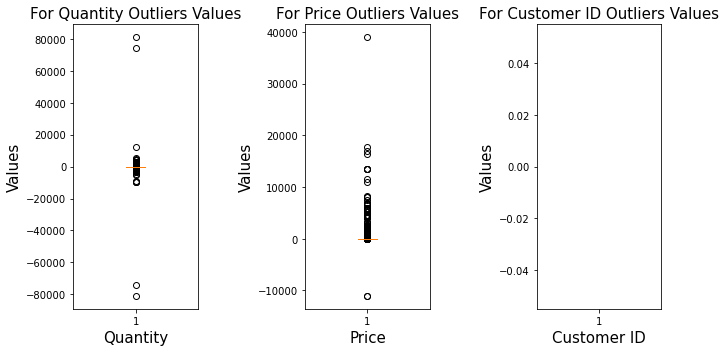

In [12]:
num_cols = [col for col in df.columns if df[col].dtype == "int64" or df[col].dtype == "float64"]

boxplot_outliers(df, num_cols)

In [13]:
def online_retail_prep(dataframe):
    dataframe.dropna(inplace = True , axis = 0)
    dataframe = dataframe[~dataframe["Invoice"].str.contains("C" , na = False)]
    dataframe = dataframe[dataframe["Quantity"] > 0 ]
    dataframe = dataframe[dataframe["Price"] > 0]
    replace_with_thresholds(dataframe, "Quantity")
    replace_with_thresholds(dataframe, "Price")
    return dataframe

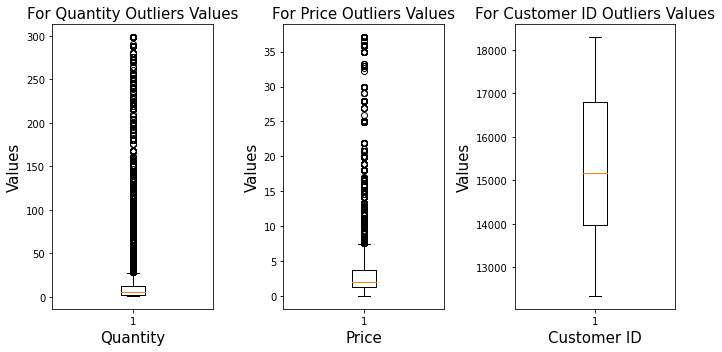

In [14]:
df = online_retail_prep(df)
boxplot_outliers(df, num_cols)

In [15]:
df.describe([.01, .99]).T

count      mean      std       min        1%       50%       99%       max
Quantity    397885.000    11.831   25.523     1.000     1.000     6.000   120.000   298.500
Price       397885.000     2.893    3.227     0.001     0.210     1.950    14.950    37.060
Customer ID 397885.000 15294.417 1713.144 12346.000 12415.000 15159.000 18211.000 18287.000

## Mission 2:

* Generate association rules through Germany customers.

In [16]:
country = df["Country"].value_counts()
country = pd.DataFrame(country).sort_values(by="Country" , ascending = False)
country.head()

Country
United Kingdom   354321
Germany            9040
France             8342
EIRE               7236
Spain              2484

In [17]:
#Germany countries we only receive...
# I just wanted to control...

df_de = df[df["Country"] == "Germany"]
df_de.Country.unique()

array(['Germany'], dtype=object)

In [18]:
# Let's go by understanding step by step what we want to achieve ...

df_de.groupby(["Invoice","Description"]).agg({"Quantity" : "sum"}).head(10)

Quantity
Invoice Description                                  
536527  3 HOOK HANGER MAGIC GARDEN             12.000
        5 HOOK HANGER MAGIC TOADSTOOL          12.000
        5 HOOK HANGER RED MAGIC TOADSTOOL      12.000
        ASSORTED COLOUR LIZARD SUCTION HOOK    24.000
        CHILDREN'S CIRCUS PARADE MUG           12.000
        HOMEMADE JAM SCENTED CANDLES           12.000
        HOT WATER BOTTLE BABUSHKA               4.000
        JUMBO BAG OWLS                         10.000
        JUMBO BAG WOODLAND ANIMALS             10.000
        MULTI COLOUR SILVER T-LIGHT HOLDER     12.000

In [19]:
values = 536527
df_de[df_de["Invoice"] == 536527]

Invoice StockCode                          Description  Quantity         InvoiceDate  Price  Customer ID  Country
1109  536527     22809              SET OF 6 T-LIGHTS SANTA     6.000 2010-12-01 13:04:00  2.950    12662.000  Germany
1110  536527     84347  ROTATING SILVER ANGELS T-LIGHT HLDR     6.000 2010-12-01 13:04:00  2.550    12662.000  Germany
1111  536527     84945   MULTI COLOUR SILVER T-LIGHT HOLDER    12.000 2010-12-01 13:04:00  0.850    12662.000  Germany
1112  536527     22242        5 HOOK HANGER MAGIC TOADSTOOL    12.000 2010-12-01 13:04:00  1.650    12662.000  Germany
1113  536527     22244           3 HOOK HANGER MAGIC GARDEN    12.000 2010-12-01 13:04:00  1.950    12662.000  Germany
1114  536527     22243    5 HOOK HANGER RED MAGIC TOADSTOOL    12.000 2010-12-01 13:04:00  1.650    12662.000  Germany
1115  536527     47421  ASSORTED COLOUR LIZARD SUCTION HOOK    24.000 2010-12-01 13:04:00  0.420    12662.000  Germany
1116  536527     20712           JUMBO BAG WOODLAND ANIMALS    10.000 2010-12-01 13:04:00  1.950    12662.000  Germany
1117  536527     20713                       JUMBO BAG OWLS    10.000 2010-12-01 13:04:00  1.950    12662.000  Germany
1118  536527     22837           HOT WATER BOTTLE BABUSHKA      4.000 2010-12-01 13:04:00  4.650    12662.000  Germany
1119  536527     22969         HOMEMADE JAM SCENTED CANDLES    12.000 2010-12-01 13:04:00  1.450    12662.000  Germany
1120  536527     22973         CHILDREN'S CIRCUS PARADE MUG    12.000 2010-12-01 13:04:00  1.650    12662.000  Germany
1121  536527    84569B       PACK 3 FIRE ENGINE/CAR PATCHES    12.000 2010-12-01 13:04:00  1.250    12662.000  Germany
1122  536527     22549                     PICTURE DOMINOES    12.000 2010-12-01 13:04:00  1.450    12662.000  Germany
1123  536527      POST                              POSTAGE     1.000 2010-12-01 13:04:00 18.000    12662.000  Germany

In [20]:
# Let's look at the working logic of the stack !!!

index = pd.MultiIndex.from_tuples([("one","a"), ("one","b"), ("two","a"), ("two","b")])
s = pd.DataFrame(data = np.arange(1.0,5.0) , index = index)
s

0
one a 1.000
    b 2.000
two a 3.000
    b 4.000

In [21]:
s.unstack()

0      
        a     b
one 1.000 2.000
two 3.000 4.000

In [22]:
s.stack()

one  a  0   1.000
     b  0   2.000
two  a  0   3.000
     b  0   4.000
dtype: float64

In [23]:
df_de.groupby(["Invoice","Description"]).agg({"Quantity" : "sum"}).unstack()

Quantity                                                                                                                                                           \
Description  50'S CHRISTMAS GIFT BAG LARGE  DOLLY GIRL BEAKER  I LOVE LONDON MINI BACKPACK  RED SPOT GIFT BAG LARGE  SET 2 TEA TOWELS I LOVE LONDON   SPACEBOY BABY GIFT SET 10 COLOUR SPACEBOY PEN   
Invoice                                                                                                                                                                                               
536527                                 NaN                NaN                          NaN                      NaN                              NaN                     NaN                    NaN   
536840                                 NaN                NaN                          NaN                      NaN                              NaN                     NaN                    NaN   
536861                                 NaN                NaN                          NaN                      NaN                              NaN                     NaN                    NaN   
536967                                 NaN                NaN                          NaN                      NaN                              NaN                     NaN                    NaN   
536983                                 NaN                NaN                          NaN                      NaN                              NaN                     NaN                    NaN   
...                                    ...                ...                          ...                      ...                              ...                     ...                    ...   
581266                                 NaN                NaN                          NaN                      NaN                              NaN                     NaN                    NaN   
581494                                 NaN                NaN                          NaN                      NaN                              NaN                     NaN                    NaN   
581570                                 NaN                NaN                          NaN                      NaN                              NaN                     NaN                    NaN   
581574                                 NaN                NaN                          NaN                      NaN                              NaN                     NaN                    NaN   
581578                                 NaN                NaN                          NaN                      NaN                              NaN                     NaN                    NaN   

                                                                                                                                                                                                       \
Description 12 COLOURED PARTY BALLOONS 12 IVORY ROSE PEG PLACE SETTINGS 12 MESSAGE CARDS WITH ENVELOPES 12 PENCIL SMALL TUBE WOODLAND 12 PENCILS SMALL TUBE RED RETROSPOT 12 PENCILS SMALL TUBE SKULL   
Invoice                                                                                                                                                                                                 
536527                             NaN                              NaN                             NaN                           NaN                                 NaN                         NaN   
536840                             NaN                              NaN                             NaN                           NaN                                 NaN                         NaN   
536861                             NaN                              NaN                             NaN                           NaN                                 NaN                         NaN   
536967                             NaN   

In [24]:
df_de.groupby(["Invoice","Description"]).agg({"Quantity" : "sum"}).unstack().fillna(0).iloc[:5,:5]

Quantity                                                                                                          
Description  50'S CHRISTMAS GIFT BAG LARGE  DOLLY GIRL BEAKER  I LOVE LONDON MINI BACKPACK  RED SPOT GIFT BAG LARGE  SET 2 TEA TOWELS I LOVE LONDON 
Invoice                                                                                                                                             
536527                               0.000              0.000                        0.000                    0.000                            0.000
536840                               0.000              0.000                        0.000                    0.000                            0.000
536861                               0.000              0.000                        0.000                    0.000                            0.000
536967                               0.000              0.000                        0.000                    0.000                            0.000
536983                               0.000              0.000                        0.000                    0.000                            0.000

In [25]:
# Is it normally bought here or not? Can we think of it as an answer to the question?

test= df_de.groupby(["Invoice","Description"]).agg({"Quantity" : "sum"}).unstack().fillna(0).iloc[20:30,10:30]
test.applymap(lambda x : 1 if x > 0 else 0)

Quantity                                                                                                                                                           \
Description 12 PENCIL SMALL TUBE WOODLAND 12 PENCILS SMALL TUBE RED RETROSPOT 12 PENCILS SMALL TUBE SKULL 12 PENCILS TALL TUBE POSY 12 PENCILS TALL TUBE RED RETROSPOT 12 PENCILS TALL TUBE SKULLS   
Invoice                                                                                                                                                                                              
539398                                  0                                   0                           0                         0                                  0                           0   
539401                                  0                                   0                           0                         0                                  0                           0   
539403                                  0                                   0                           0                         0                                  0                           0   
539405                                  1                                   0                           0                         0                                  0                           0   
539408                                  1                                   0                           0                         0                                  0                           0   
539446                                  0                                   0                           0                         0                                  0                           0   
539466                                  0                                   0                           0                         0                                  0                           0   
539636                                  0                                   0                           0                         0                                  0                           0   
539946                                  0                                   0                           0                         0                                  0                           0   
539957                                  0                                   0                           0                         0                                  0                           0   

                                                                                                                                                                           \
Description 12 PENCILS TALL TUBE WOODLAND 12 PINK HEN+CHICKS IN BASKET 12 RED ROSE PEG PLACE SETTINGS 16 PIECE CUTLERY SET PANTRY DESIGN 2 PICTURE BOOK EGGS EASTER BUNNY   
Invoice                                                                                                                                                                     
539398                                  0                            0                              0                                  0                                0   
539401                                  0                            0                              0                                  0                                0   
539403                                  0                            0                              0                                  0                                0   
539405                                  0                            0                              0                                  0                                0   
539408                                  0                            0                              0                                  0                                0   
539446                                  0                            0    

In [26]:
# I wanted to look at why there is a difference between stockcode and description.. !!!
# Normally, there is only one product per invoice, but it seems that more than one product is included here.

df.StockCode.value_counts()

85123A    2035
22423     1723
85099B    1618
84879     1408
47566     1396
          ... 
16161M       1
20703        1
90152C       1
90179C       1
79323B       1
Name: StockCode, Length: 3665, dtype: int64

In [27]:
df.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1723
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1396
                                      ... 
CHRISTMAS CRAFT HEART STOCKING           1
RUBY GLASS CLUSTER NECKLACE              1
SILVER BOOK MARK WITH BEADS              1
PINK/AMETHYST/GOLD NECKLACE              1
FLAG OF ST GEORGE CAR FLAG               1
Name: Description, Length: 3877, dtype: int64

In [28]:
stockcode = df[df["StockCode"] == "85123A"][["Description","Quantity"]]
description = df[df["Description"] == "WHITE HANGING HEART T-LIGHT HOLDER"][["Description","Quantity"]]

In [29]:
# I made the generalization here for the whole df, I would like to point out that (not only for the Germans...) ...
# As a different result from here, there may be a different description name belonging to that stockcode ...
# That's why we get a different result in value_counts() values ....

col ="Description"

print(f"For {col} Unique Values : {stockcode[col].unique()}\nAnd Count: {stockcode[col].count()} ",end = "\n\n")
print(f"For {col} Unique Values : {description[col].unique()}\nAnd Count : {description[col].count()} ")

For Description Unique Values : ['WHITE HANGING HEART T-LIGHT HOLDER' 'CREAM HANGING HEART T-LIGHT HOLDER']
And Count: 2035 

For Description Unique Values : ['WHITE HANGING HEART T-LIGHT HOLDER']
And Count : 2028 


In [30]:
def create_invoice_product_df(dataframe, id = False):
        
    if id :
        col_name = "StockCode"
        return dataframe.groupby(["Invoice", col_name ])["Quantity"].sum().unstack().fillna(0).\
                                                                        applymap(lambda x : 1 if x > 0 else 0)
    
    else:
        col_name = "Description"
        return dataframe.groupby(["Invoice", col_name ])["Quantity"].sum().unstack().fillna(0).\
                                                                        applymap(lambda x : 1 if x > 0 else 0)

In [31]:
df_de_desc = create_invoice_product_df(df_de)
df_de_id = create_invoice_product_df(df_de , id = True)

print("For Description Germany DataFrame Shape : {}".format(df_de_desc.shape))

print("For ID Germany DataFrame Shape : {}".format(df_de_id.shape))

For Description Germany DataFrame Shape : (457, 1696)
For ID Germany DataFrame Shape : (457, 1664)


In [32]:
df_de.head()

Invoice StockCode                          Description  Quantity         InvoiceDate  Price  Customer ID  Country
1109  536527     22809              SET OF 6 T-LIGHTS SANTA     6.000 2010-12-01 13:04:00  2.950    12662.000  Germany
1110  536527     84347  ROTATING SILVER ANGELS T-LIGHT HLDR     6.000 2010-12-01 13:04:00  2.550    12662.000  Germany
1111  536527     84945   MULTI COLOUR SILVER T-LIGHT HOLDER    12.000 2010-12-01 13:04:00  0.850    12662.000  Germany
1112  536527     22242        5 HOOK HANGER MAGIC TOADSTOOL    12.000 2010-12-01 13:04:00  1.650    12662.000  Germany
1113  536527     22244           3 HOOK HANGER MAGIC GARDEN    12.000 2010-12-01 13:04:00  1.950    12662.000  Germany

## Mission 2:

***Produce association rules through Germany customers.***

* antecedent support: X probability alone

* consequent support: Y probability alone

* support: probability of both occurring together

* confidence: probability of getting Y when X is taken.

* lift: When X is taken, the probability of getting Y increases .. times.

* conviction: expected frequency of X without Y

In [33]:
# I looked at the difference ...
# When you do this, you may get an error in the function.... (in association_rules....)
# Quantity !!!!!!!

df_de.groupby(["Invoice", "StockCode"]).agg({"Quantity" : "sum"}).unstack().fillna(0). \
                                                                applymap(lambda x : 1 if x > 0 else 0).iloc[:5]

Quantity                                                                                                                                                                                \
StockCode    10002 10125 10135 11001 15034 15036 15039 16008 16011 16014 16016 16045 16054 16218 16235 16236 16237 16238 16259 17003 20652 20658 20665 20668 20674 20675 20676 20677 20679 20681   
Invoice                                                                                                                                                                                            
536527           0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0   
536840           0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0   
536861           0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0   
536967           0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0   
536983           0     0     0     0     0     0     0     0     0     0     1     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0   

                                                                                                                                                                                                     \
StockCode 20682 20684 20685 20696 20702 20704 20705 20707 20711 20712 20713 20716 20717 20718 20719 20723 20724 20725 20726 20727 20728 20749 20750 20751 20752 20754 20755 20761 20766 20767 20772   
Invoice                                                                                                                                                                                               
536527        0     0     0     0     0     0     0     0     0     1     1     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0   
536840        0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0   
536861        0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0   
536967        0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0   
536983        0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0   

                                                                                                                                                                                                     \
StockCode 20774 20794 20796 20828 20846 20897 20902 20903 20914 20961 20963 20971 20972 20973 20974 20975 20977 20978 20979 20981 20982 20983 20984 20992 20997 20998 21002 21014 21015 21025 21034   
Invoice                                                                                                                                                                                               
536527        0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0   
536840        0     0     0     0     0     0     0 

In [34]:
df_de_id.head()

StockCode  10002  10125  10135  11001  15034  15036  15039  16008  16011  16014  16016  16045  16054  16218  16235  16236  16237  16238  16259  17003  20652  20658  20665  20668  20674  20675  \
Invoice                                                                                                                                                                                           
536527         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   
536840         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   
536861         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   
536967         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   
536983         0      0      0      0      0      0      0      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   

StockCode  20676  20677  20679  20681  20682  20684  20685  20696  20702  20704  20705  20707  20711  20712  20713  20716  20717  20718  20719  20723  20724  20725  20726  20727  20728  20749  \
Invoice                                                                                                                                                                                           
536527         0      0      0      0      0      0      0      0      0      0      0      0      0      1      1      0      0      0      0      0      0      0      0      0      0      0   
536840         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   
536861         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   
536967         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   
536983         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   

StockCode  20750  20751  20752  20754  20755  20761  20766  20767  20772  20774  20794  20796  20828  20846  20897  20902  20903  20914  20961  20963  20971  20972  20973  20974  20975  20977  \
Invoice                                                                                                                                                                                           
536527         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   
536840         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   
536861         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   
536967         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   
536983         0      0      0      0      0      0      0      0      0      0      0      0     

In [35]:
"""
  use_colnames : bool (default: False)
      If `True`, uses the DataFrames' column names in the returned DataFrame
      instead of column indices.
  
  min_support : float (default: 0.5)
      A float between 0 and 1 for minumum support of the itemsets returned.
      The support is computed as the fraction
      `transactions_where_item(s)_occur / total_transactions`.
      

  """


from mlxtend.frequent_patterns import apriori , association_rules

In [36]:
frequent_itemsets = apriori(df= df_de_id,min_support=0.01, use_colnames=True)
frequent_itemsets.sort_values(by = "support", ascending = False)

support                                          itemsets
538     0.818                                            (POST)
189     0.245                                           (22326)
1864    0.225                                     (POST, 22326)
191     0.158                                           (22328)
1931    0.151                                     (22328, POST)
...       ...                                               ...
1984    0.011                                    (22352, 22636)
4580    0.011                              (22730, POST, 22326)
4581    0.011                              (22734, 22326, POST)
4582    0.011                              (22894, POST, 22326)
6954    0.011  (22467, 22629, POST, 22326, 22423, 21915, 22077)

[6955 rows x 2 columns]

In [37]:
"""
min_threshold : float (default: 0.8)
  Minimal threshold for the evaluation metric,
  via the `metric` parameter,
  to decide whether a candidate rule is of interest.

metric : string (default: 'confidence')
  Metric to evaluate if a rule is of interest.
  **Automatically set to 'support' if `support_only=True`.**
  Otherwise, supported metrics are 'support', 'confidence', 'lift',
  'leverage', and 'conviction'

"""

rules = association_rules(df = frequent_itemsets, metric="support", min_threshold=0.01)
rules

antecedents                                 consequents  antecedent support  consequent support  support  confidence   lift  leverage  conviction
0         (10125)                                      (POST)               0.013               0.818    0.013       1.000  1.222     0.002         inf
1          (POST)                                     (10125)               0.818               0.013    0.013       0.016  1.222     0.002       1.003
2         (15036)                                      (POST)               0.020               0.818    0.015       0.778  0.950    -0.001       0.817
3          (POST)                                     (15036)               0.818               0.020    0.015       0.019  0.950    -0.001       0.999
4         (16016)                                      (POST)               0.011               0.818    0.011       1.000  1.222     0.002         inf
...           ...                                         ...                 ...                 ...      ...         ...    ...       ...         ...
49607      (POST)  (22467, 22629, 22326, 22423, 21915, 22077)               0.818               0.011    0.011       0.013  1.222     0.002       1.002
49608     (22326)   (22467, 22629, POST, 22423, 21915, 22077)               0.245               0.011    0.011       0.045  4.080     0.008       1.035
49609     (22423)   (22467, 22629, POST, 22326, 21915, 22077)               0.138               0.011    0.011       0.079  7.254     0.009       1.074
49610     (21915)   (22467, 22629, POST, 22326, 22423, 22077)               0.046               0.011    0.011       0.238 21.762     0.010       1.298
49611     (22077)   (22467, 22629, POST, 22326, 22423, 21915)               0.103               0.011    0.011       0.106  9.723     0.010       1.107

[49612 rows x 9 columns]

In [38]:
rules.sort_values(by = "support", ascending =False).head(10)

antecedents     consequents  antecedent support  consequent support  support  confidence  lift  leverage  conviction
2650          (POST)         (22326)               0.818               0.245    0.225       0.275 1.124     0.025       1.042
2651         (22326)          (POST)               0.245               0.818    0.225       0.920 1.124     0.025       2.260
2784         (22328)          (POST)               0.158               0.818    0.151       0.958 1.171     0.022       4.359
2785          (POST)         (22328)               0.818               0.158    0.151       0.184 1.171     0.022       1.033
2414         (22328)         (22326)               0.158               0.245    0.131       0.833 3.400     0.093       4.530
2415         (22326)         (22328)               0.245               0.158    0.131       0.536 3.400     0.093       1.815
14195        (22328)   (POST, 22326)               0.158               0.225    0.125       0.792 3.513     0.089       3.718
14194  (POST, 22326)         (22328)               0.225               0.158    0.125       0.553 3.513     0.089       1.886
14197        (22326)   (22328, POST)               0.245               0.151    0.125       0.509 3.371     0.088       1.729
14196         (POST)  (22328, 22326)               0.818               0.131    0.125       0.152 1.161     0.017       1.025

In [39]:
rules.sort_values(by = "lift", ascending =False).head(10)

antecedents            consequents  antecedent support  consequent support  support  confidence   lift  leverage  conviction
24749         (21989, 21086)         (21987, 21988)               0.011               0.011    0.011       1.000 91.400     0.011         inf
39035         (21987, 21988)  (21086, 21989, 21094)               0.011               0.011    0.011       1.000 91.400     0.011         inf
24744         (21987, 21988)         (21989, 21086)               0.011               0.011    0.011       1.000 91.400     0.011         inf
24745         (21987, 21989)         (21988, 21086)               0.011               0.011    0.011       1.000 91.400     0.011         inf
24748         (21988, 21086)         (21987, 21989)               0.011               0.011    0.011       1.000 91.400     0.011         inf
39026  (21987, 21988, 21094)         (21989, 21086)               0.011               0.011    0.011       1.000 91.400     0.011         inf
39028  (21987, 21989, 21094)         (21988, 21086)               0.011               0.011    0.011       1.000 91.400     0.011         inf
39033  (21086, 21988, 21094)         (21987, 21989)               0.011               0.011    0.011       1.000 91.400     0.011         inf
39034  (21086, 21989, 21094)         (21987, 21988)               0.011               0.011    0.011       1.000 91.400     0.011         inf
39036         (21987, 21989)  (21086, 21988, 21094)               0.011               0.011    0.011       1.000 91.400     0.011         inf

In [40]:
sorted_rules = rules.sort_values(by = "lift", ascending = False)
sorted_rules.head()

antecedents            consequents  antecedent support  consequent support  support  confidence   lift  leverage  conviction
24749  (21989, 21086)         (21987, 21988)               0.011               0.011    0.011       1.000 91.400     0.011         inf
39035  (21987, 21988)  (21086, 21989, 21094)               0.011               0.011    0.011       1.000 91.400     0.011         inf
24744  (21987, 21988)         (21989, 21086)               0.011               0.011    0.011       1.000 91.400     0.011         inf
24745  (21987, 21989)         (21988, 21086)               0.011               0.011    0.011       1.000 91.400     0.011         inf
24748  (21988, 21086)         (21987, 21989)               0.011               0.011    0.011       1.000 91.400     0.011         inf

## Mission 3:

***What are the names of the products whose IDs are given?***

* User 1 product id: 21987
* User 2 product id: 23235
* User 3 product id: 22747

In [41]:
users = {"User_1" : 21987, "User_2" : 23235, "User_3" : 22747}


In [42]:
def check_description(dataframe, stock_code):
    product_name = dataframe[dataframe["StockCode"] == stock_code]["Description"].values[0]
    return product_name

In [43]:
for user in users.keys():
    
    print(f"For {user} StockCode : '{users[user]}' Description : {check_description(df, users[user])}")

For User_1 StockCode : '21987' Description : PACK OF 6 SKULL PAPER CUPS
For User_2 StockCode : '23235' Description : STORAGE TIN VINTAGE LEAF
For User_3 StockCode : '22747' Description : POPPY'S PLAYHOUSE BATHROOM


In [44]:
df[df["StockCode"] == 21987]["Description"].values[0]

'PACK OF 6 SKULL PAPER CUPS'

## Task 4 and Task 5:

* Make a product recommendation for the users in the cart.

* What are the names of the recommended products?

In [45]:
sorted_rules.head(10)

antecedents            consequents  antecedent support  consequent support  support  confidence   lift  leverage  conviction
24749         (21989, 21086)         (21987, 21988)               0.011               0.011    0.011       1.000 91.400     0.011         inf
39035         (21987, 21988)  (21086, 21989, 21094)               0.011               0.011    0.011       1.000 91.400     0.011         inf
24744         (21987, 21988)         (21989, 21086)               0.011               0.011    0.011       1.000 91.400     0.011         inf
24745         (21987, 21989)         (21988, 21086)               0.011               0.011    0.011       1.000 91.400     0.011         inf
24748         (21988, 21086)         (21987, 21989)               0.011               0.011    0.011       1.000 91.400     0.011         inf
39026  (21987, 21988, 21094)         (21989, 21086)               0.011               0.011    0.011       1.000 91.400     0.011         inf
39028  (21987, 21989, 21094)         (21988, 21086)               0.011               0.011    0.011       1.000 91.400     0.011         inf
39033  (21086, 21988, 21094)         (21987, 21989)               0.011               0.011    0.011       1.000 91.400     0.011         inf
39034  (21086, 21989, 21094)         (21987, 21988)               0.011               0.011    0.011       1.000 91.400     0.011         inf
39036         (21987, 21989)  (21086, 21988, 21094)               0.011               0.011    0.011       1.000 91.400     0.011         inf

In [46]:
# ...[0] the reason we do it is to catch it from the list.... !!!!

# antecedent support: X probability alone
# consequent support: Y probability alone

product_id = 21987

recommendation_list = []
last_list = []
iloc = []

for i,products in enumerate(sorted_rules["antecedents"]):
    for j in list(products):
        if j == product_id:
            recommendation_list.append(list(sorted_rules.iloc[i]["consequents"])[0])
            iloc.append(i)
            
recommendation_list[:10]

[21086, 21989, 21988, 21989, 21988, 21086, 21988, 21988, 21989, 21989]

In [47]:
# Unique values

set(recommendation_list)

{21086, 21094, 21988, 21989, 'POST'}

In [48]:
# Unique values
# Same Way

for i in recommendation_list:
    if i not in last_list:
        last_list.append(i)
        
last_list

[21086, 21989, 21988, 'POST', 21094]

In [49]:
# Remember, we did this for the Germans.
# For german we used apriori and association_rules !!!!

def arl_recommender(dataframe , rules_df , product_id, rec_count = 1):
    
    product_name = dataframe[dataframe["StockCode"] ==  product_id]["Description"].values[0]
    print(" ID and Product Name used for the recommendation ".upper().center(100,"#"),end = "\n\n")
    print(f"Product Name : {product_name}\nProduct ID : {product_id}",end = "\n\n")
    
    recommendation_list = []
    last_list = []
    
    for i,products in enumerate(rules_df["antecedents"]):
        for j in list(products):
            if product_id == j:
                recommendation_list.append(list(rules_df.iloc[i]["consequents"])[0])
                
    for product in recommendation_list:
        if product not in last_list:
            last_list.append(product)
    
    print(" Recommended Total Product ID ".upper().center(100,"#"),end = "\n\n")
    
    for product_id in last_list:
        description = dataframe[dataframe["StockCode"] ==  product_id]["Description"].values[0]
        print(f"Product ID : {product_id} ,Description : {description}")
    print("\n")
        
    if 1 <=rec_count <= len(last_list):
        
        print(" Recommended Stock Code ID and Product Name ".upper().center(100,"#"),end = "\n\n")
        for num in range(rec_count):
            product_id = last_list[num]
            description = dataframe[dataframe["StockCode"] == product_id ]["Description"].values[0]
            print(f"Product ID : {product_id}, Description : {description}")
            
    elif rec_count == 0:
        
        print(" Recommended Stock Code ID and Product Name ".upper().center(100,"#"),end = "\n\n")
        print("You entered 0 as a recommended value !!!" , end = "\n\n")
        
    elif rec_count < 0 :
        
        print(" Attention ".upper().center(100,"#"),end = "\n\n")
        print("Please do not enter negative numbers !!!!", end = "\n\n")
    
    else:
        
        print(" Recommended Stock Code ID and Product Name ".upper().center(100,"#"),end = "\n\n")
        print(f"Recommended Product Quantity is Maximum {len(last_list)}!!!!!\n")
        
        rec_count = len(last_list)
        for num in range(rec_count):
            product_id = last_list[num]
            description = dataframe[dataframe["StockCode"] ==  product_id]["Description"].values[0]
            print(f"Product ID : {product_id}, Description : {description}")
            

In [50]:
arl_recommender(df_de, sorted_rules, users['User_1'], rec_count = 6)

######################### ID AND PRODUCT NAME USED FOR THE RECOMMENDATION ##########################

Product Name : PACK OF 6 SKULL PAPER CUPS
Product ID : 21987

################################### RECOMMENDED TOTAL PRODUCT ID ###################################

Product ID : 21086 ,Description : SET/6 RED SPOTTY PAPER CUPS
Product ID : 21989 ,Description : PACK OF 20 SKULL PAPER NAPKINS
Product ID : 21988 ,Description : PACK OF 6 SKULL PAPER PLATES
Product ID : POST ,Description : POSTAGE
Product ID : 21094 ,Description : SET/6 RED SPOTTY PAPER PLATES


############################ RECOMMENDED STOCK CODE ID AND PRODUCT NAME ############################

Recommended Product Quantity is Maximum 5!!!!!

Product ID : 21086, Description : SET/6 RED SPOTTY PAPER CUPS
Product ID : 21989, Description : PACK OF 20 SKULL PAPER NAPKINS
Product ID : 21988, Description : PACK OF 6 SKULL PAPER PLATES
Product ID : POST, Description : POSTAGE
Product ID : 21094, Description : SET/6 RED SPOTTY PAPER

In [51]:
arl_recommender(df_de, sorted_rules, users['User_1'], rec_count = 3)

######################### ID AND PRODUCT NAME USED FOR THE RECOMMENDATION ##########################

Product Name : PACK OF 6 SKULL PAPER CUPS
Product ID : 21987

################################### RECOMMENDED TOTAL PRODUCT ID ###################################

Product ID : 21086 ,Description : SET/6 RED SPOTTY PAPER CUPS
Product ID : 21989 ,Description : PACK OF 20 SKULL PAPER NAPKINS
Product ID : 21988 ,Description : PACK OF 6 SKULL PAPER PLATES
Product ID : POST ,Description : POSTAGE
Product ID : 21094 ,Description : SET/6 RED SPOTTY PAPER PLATES


############################ RECOMMENDED STOCK CODE ID AND PRODUCT NAME ############################

Product ID : 21086, Description : SET/6 RED SPOTTY PAPER CUPS
Product ID : 21989, Description : PACK OF 20 SKULL PAPER NAPKINS
Product ID : 21988, Description : PACK OF 6 SKULL PAPER PLATES


In [52]:
arl_recommender(df_de, sorted_rules, users['User_1'], rec_count = 0)

######################### ID AND PRODUCT NAME USED FOR THE RECOMMENDATION ##########################

Product Name : PACK OF 6 SKULL PAPER CUPS
Product ID : 21987

################################### RECOMMENDED TOTAL PRODUCT ID ###################################

Product ID : 21086 ,Description : SET/6 RED SPOTTY PAPER CUPS
Product ID : 21989 ,Description : PACK OF 20 SKULL PAPER NAPKINS
Product ID : 21988 ,Description : PACK OF 6 SKULL PAPER PLATES
Product ID : POST ,Description : POSTAGE
Product ID : 21094 ,Description : SET/6 RED SPOTTY PAPER PLATES


############################ RECOMMENDED STOCK CODE ID AND PRODUCT NAME ############################

You entered 0 as a recommended value !!!



In [53]:
arl_recommender(df_de, sorted_rules, users['User_1'], rec_count = -2)

######################### ID AND PRODUCT NAME USED FOR THE RECOMMENDATION ##########################

Product Name : PACK OF 6 SKULL PAPER CUPS
Product ID : 21987

################################### RECOMMENDED TOTAL PRODUCT ID ###################################

Product ID : 21086 ,Description : SET/6 RED SPOTTY PAPER CUPS
Product ID : 21989 ,Description : PACK OF 20 SKULL PAPER NAPKINS
Product ID : 21988 ,Description : PACK OF 6 SKULL PAPER PLATES
Product ID : POST ,Description : POSTAGE
Product ID : 21094 ,Description : SET/6 RED SPOTTY PAPER PLATES


############################################ ATTENTION #############################################

Please do not enter negative numbers !!!!



In [54]:
for product_id in users.values():
    
    arl_recommender(df_de, sorted_rules, product_id, rec_count=3)
    print("\n","".center(100,"*"),end="\n\n")

######################### ID AND PRODUCT NAME USED FOR THE RECOMMENDATION ##########################

Product Name : PACK OF 6 SKULL PAPER CUPS
Product ID : 21987

################################### RECOMMENDED TOTAL PRODUCT ID ###################################

Product ID : 21086 ,Description : SET/6 RED SPOTTY PAPER CUPS
Product ID : 21989 ,Description : PACK OF 20 SKULL PAPER NAPKINS
Product ID : 21988 ,Description : PACK OF 6 SKULL PAPER PLATES
Product ID : POST ,Description : POSTAGE
Product ID : 21094 ,Description : SET/6 RED SPOTTY PAPER PLATES


############################ RECOMMENDED STOCK CODE ID AND PRODUCT NAME ############################

Product ID : 21086, Description : SET/6 RED SPOTTY PAPER CUPS
Product ID : 21989, Description : PACK OF 20 SKULL PAPER NAPKINS
Product ID : 21988, Description : PACK OF 6 SKULL PAPER PLATES

 ****************************************************************************************************

######################### ID AND PRODUCT 

In [55]:
while True:
    print("""
    
     Example Stock Codes: 23254,23255,22899
    
     Just Press "q" to exit....
    
     Transactions will be taken according to the sorted_rules dataframe.
    
     """)
    
    product_id = input("INPUT STOCK CODE:\n")
    rec_count = input("HOW MANY PRODUCT RECOMMENDATIONS DO YOU WANT:\n")
    
    if product_id == "q" or rec_count == "q":
        print("Logout !!!!!!")
        break
        
    else:
        product_id = int(product_id )
        rec_count = int(rec_count)
        
        arl_recommender(df_de, sorted_rules, product_id ,rec_count)


    
     Example Stock Codes: 23254,23255,22899
    
     Just Press "q" to exit....
    
     Transactions will be taken according to the sorted_rules dataframe.
    
     
INPUT STOCK CODE:
23254
HOW MANY PRODUCT RECOMMENDATIONS DO YOU WANT:
11
######################### ID AND PRODUCT NAME USED FOR THE RECOMMENDATION ##########################

Product Name : CHILDRENS CUTLERY DOLLY GIRL 
Product ID : 23254

################################### RECOMMENDED TOTAL PRODUCT ID ###################################

Product ID : 22331 ,Description : WOODLAND PARTY BAG + STICKER SET
Product ID : 22352 ,Description : LUNCH BOX WITH CUTLERY RETROSPOT 
Product ID : 23256 ,Description : CHILDRENS CUTLERY SPACEBOY 
Product ID : 23291 ,Description : DOLLY GIRL CHILDRENS CUP
Product ID : 22326 ,Description : ROUND SNACK BOXES SET OF4 WOODLAND 
Product ID : 23289 ,Description : DOLLY GIRL CHILDRENS BOWL
Product ID : POST ,Description : POSTAGE
Product ID : 22382 ,Description : LUNCH BAG SPACEBOY DE

## Extra

In [56]:
def dataframe_prep(dataframe, Country , id = True):
    
    from mlxtend.frequent_patterns import apriori, association_rules
    
    dataframe = dataframe.dropna(axis=0)
    dataframe = dataframe[~dataframe["Invoice"].str.contains("C",na = False)]
    dataframe = dataframe[dataframe["Quantity"] > 0 ]
    dataframe = dataframe[dataframe["Price"] > 0]
    replace_with_thresholds(dataframe, "Quantity")
    replace_with_thresholds(dataframe, "Price")
    
    dataframe = dataframe[dataframe["Country"] == Country]
    print(dataframe.Country.unique())
    
    if id:
        
        dataframe = \
        dataframe.groupby(["Invoice","StockCode"])["Quantity"].sum().unstack().fillna(0).\
                                                                    applymap(lambda x : 1 if x > 0 else 0)
        
    else:
        
        dataframe = \
        dataframe.groupby(["Invoice","Description"])["Quantity"].sum().unstack().fillna(0).\
                                                                    applymap(lambda x : 1 if x > 0 else 0)
        
        
    frequent_itemsets = apriori(df = dataframe,
                                min_support=0.01, 
                                use_colnames=True)
    
    rules = association_rules(df = frequent_itemsets,
                              metric= "support",
                              min_threshold=0.01)
    
    sorted_rules = rules.sort_values(by = "lift" , ascending = False)
    
    return dataframe, sorted_rules

In [57]:
df_test = online_retail.copy()

In [58]:
df_test.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [59]:
df_test[df_test["Invoice"].str.contains("C", na = False)]["Invoice"].unique()

array(['C536379', 'C536383', 'C536391', ..., 'C581499', 'C581568',
       'C581569'], dtype=object)

In [60]:
df_fr , sorted_rules = dataframe_prep(df_test , "France", id = True)

['France']


In [61]:
df_fr

StockCode  10002  10120  10125  10135  11001  15036  15039  16012  16048  16218  16219  16225  16236  16237  16238  17174  20615  20617  20658  20665  20668  20674  20675  20676  20677  20679  \
Invoice                                                                                                                                                                                           
536370         1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   
536852         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   
536974         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      1   
537065         0      0      0      0      0      0      0      0      0      0      0      0      0      0      1      0      0      0      0      1      0      0      0      0      0      0   
537463         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
580986         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   
581001         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   
581171         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   
581279         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   
581587         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   

StockCode  20681  20682  20684  20685  20686  20702  20704  20711  20712  20713  20717  20718  20719  20723  20724  20725  20726  20727  20728  20749  20750  20751  20767  20777  20819  20832  \
Invoice                                                                                                                                                                                           
536370         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   
536852         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   
536974         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      1      1      0      0      1      1      0      0      0      0      0   
537065         0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      1      1      0      1      1      1      0      0      0      0      0   
537463         1      1      0      0      0      0      0      0      0      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ..

In [62]:
sorted_rules

antecedents                   consequents  antecedent support  consequent support  support  confidence   lift  leverage  conviction
1082358         (22659, 23206, 22726, 22727)  (21558, 23254, 22326, 23199)               0.010               0.010    0.010       1.000 97.250     0.010         inf
1160023  (22727, 22728, 22352, 23254, 23199)  (22326, 21558, 22726, 20750)               0.010               0.010    0.010       1.000 97.250     0.010         inf
1160025  (22727, 22728, 21558, 23254, 22326)  (22352, 23199, 22726, 20750)               0.010               0.010    0.010       1.000 97.250     0.010         inf
1160026  (22727, 22728, 23254, 22326, 23199)  (22352, 21558, 22726, 20750)               0.010               0.010    0.010       1.000 97.250     0.010         inf
1160027  (22727, 22728, 21558, 22326, 23199)  (22352, 23254, 22726, 20750)               0.010               0.010    0.010       1.000 97.250     0.010         inf
...                                      ...                           ...                 ...                 ...      ...         ...    ...       ...         ...
2744                                  (POST)                       (21535)               0.774               0.028    0.010       0.013  0.470    -0.012       0.985
25539                                (21080)                 (23084, POST)               0.134               0.167    0.010       0.077  0.460    -0.012       0.902
25538                          (23084, POST)                       (21080)               0.167               0.134    0.010       0.062  0.460    -0.012       0.923
1742                                 (21080)                       (23084)               0.134               0.188    0.010       0.077  0.410    -0.015       0.880
1743                                 (23084)                       (21080)               0.188               0.134    0.010       0.055  0.410    -0.015       0.917

[1372704 rows x 9 columns]

In [63]:
df_fr , sorted_rules = dataframe_prep(df_test , "France", id = False)

['France']


In [64]:
df_fr

Description   50'S CHRISTMAS GIFT BAG LARGE   DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK   NINE DRAWER OFFICE TIDY   SET 2 TEA TOWELS I LOVE LONDON    SPACEBOY BABY GIFT SET  \
Invoice                                                                                                                                                                              
536370                                    0                   0                             0                         0                                 1                        0   
536852                                    0                   0                             0                         0                                 0                        0   
536974                                    0                   0                             0                         0                                 0                        0   
537065                                    0                   0                             0                         0                                 0                        0   
537463                                    0                   0                             0                         0                                 0                        0   
...                                     ...                 ...                           ...                       ...                               ...                      ...   
580986                                    0                   0                             0                         0                                 0                        0   
581001                                    0                   0                             0                         0                                 0                        0   
581171                                    0                   0                             0                         0                                 0                        0   
581279                                    0                   0                             0                         0                                 0                        0   
581587                                    0                   0                             0                         0                                 0                        0   

Description   TRELLIS COAT RACK  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  12 EGG HOUSE PAINTED WOOD  12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMALL TUBE WOODLAND  \
Invoice                                                                                                                                                                          
536370                        0                       0                           0                          0                                0                              0   
536852                        0                       0                           0                          0                                0                              0   
536974                        0                       0                           0                          0                                0                              0   
537065                        0                       0                           0                          0                                0                              0   
537463                        0                       0                           0                          0                                0                              0   
...                         ...                     ...                         ...                        ...                              ...                            ...   
580986                        0                       0                           0                          0                                0                              0   
581001                        0

In [65]:
sorted_rules

antecedents                                        consequents  antecedent support  consequent support  support  confidence   lift  leverage  \
895449   (PLASTERS IN TIN WOODLAND ANIMALS, ROUND SNACK...  (BUNDLE OF 3 SCHOOL EXERCISE BOOKS  , TREASURE...               0.010               0.010    0.010       1.000 97.250     0.010   
1136848  (DOLLY GIRL CHILDRENS CUP, JUMBO BAG APPLES, S...  (CHILDRENS CUTLERY DOLLY GIRL , ALARM CLOCK BA...               0.010               0.010    0.010       1.000 97.250     0.010   
1136850  (JUMBO BAG APPLES, ALARM CLOCK BAKELIKE PINK, ...  (CHILDRENS CUTLERY DOLLY GIRL , ALARM CLOCK BA...               0.010               0.010    0.010       1.000 97.250     0.010   
1136851  (JUMBO BAG APPLES, ALARM CLOCK BAKELIKE RED , ...  (CHILDRENS CUTLERY DOLLY GIRL , ALARM CLOCK BA...               0.010               0.010    0.010       1.000 97.250     0.010   
1136852  (DOLLY GIRL CHILDRENS CUP, JUMBO BAG APPLES, L...  (CHILDRENS CUTLERY DOLLY GIRL , ALARM CLOCK BA...               0.010               0.010    0.010       1.000 97.250     0.010   
...                                                    ...                                                ...                 ...                 ...      ...         ...    ...       ...   
7443                                             (POSTAGE)                     (RED RETROSPOT SMALL MILK JUG)               0.774               0.028    0.010       0.013  0.470    -0.012   
62623                (SET/20 RED RETROSPOT PAPER NAPKINS )                      (RABBIT NIGHT LIGHT, POSTAGE)               0.134               0.167    0.010       0.077  0.460    -0.012   
62622                        (RABBIT NIGHT LIGHT, POSTAGE)              (SET/20 RED RETROSPOT PAPER NAPKINS )               0.167               0.134    0.010       0.062  0.460    -0.012   
7792                 (SET/20 RED RETROSPOT PAPER NAPKINS )                               (RABBIT NIGHT LIGHT)               0.134               0.188    0.010       0.077  0.410    -0.015   
7793                                  (RABBIT NIGHT LIGHT)              (SET/20 RED RETROSPOT PAPER NAPKINS )               0.188               0.134    0.010       0.055  0.410    -0.015   

         conviction  
895449          inf  
1136848         inf  
1136850         inf  
1136851         inf  
1136852         inf  
...             ...  
7443          0.985  
62623         0.902  
62622         0.923  
7792          0.880  
7793          0.917  

[1354988 rows x 9 columns]